# Побудова моделі на простих даних

Для початку розглянемо простий приклад і побудуємо нейромережу, яку нам треба заоверфітити на простих даних. Тут я додатково покажу кодування іншим способом, де кожній літері відповідає її порядковий номер. Розглянемо в чому приципова різниця між цими підходами і який взагалі варто обирати.

Для моделей типу **RNN** або **LSTM**, принципова різниця між кодуванням токенів через **індекси токенів** (індексація) та **one-hot кодуванням** полягає в тому, як вони передають інформацію про кожен токен та як це впливає на тренування моделі.

### 1. Індексація токенів
При індексації кожен токен (слово, літера або символ) представляється цілим числом — індексом у словнику. Наприклад:

- "слово1" — 1
- "слово2" — 2
- "слово3" — 3

Це не несе ніякої семантичної інформації про схожість або контекст між словами, однак використовується для того, щоб передати кожен токен у вигляді числового значення.

Зазвичай індексація токенів поєднується з **ембеддінгами** (наприклад, через шар `Embedding` в PyTorch чи Keras), де кожен індекс переводиться в вектор більш високої розмірності. Вектори ембеддінгів можуть навчатися, і в результаті слова, що мають схожий контекст або значення, отримують схожі вектори в цьому просторі.

#### Переваги індексації для RNN/LSTM:
- **Ефективність**: Передача індексу — це компактний спосіб представлення слів, і вже самі нейронні мережі можуть навчатися на основі цього представлення.
- **Навчання семантики**: Індексні представлення зазвичай використовуються разом з векторними ембеддінгами (вбудовуваннями), що дозволяє моделі вчитися семантичним відносинам між словами.
- **Легкість інтеграції**: У нейронних мережах легко використовувати індексацію з шарами ембеддінгів, оскільки вони ефективно використовують пам'ять і дозволяють мережі краще захоплювати семантику.

#### Недоліки:
- **Початковий етап**: Інколи модель починає з випадкових ембеддінгів і повинна навчитися відповідній репрезентації, що може потребувати більше ресурсів і часу на тренування.

### 2. One-Hot Кодування
**One-hot кодування** представляє кожен токен як вектор, в якому одна позиція містить значення 1, а всі інші — 0. Наприклад, для словника з 3 словами:

- "слово1" — [1, 0, 0]
- "слово2" — [0, 1, 0]
- "слово3" — [0, 0, 1]

Це означає, що кожне слово чи токен є унікальним і не має жодної інформації про відстані чи подібність до інших слів.

#### Переваги для RNN/LSTM:
- **Ортогональність**: Модель не робить припущень про відносини між токенами на основі їх кодування (всі вони ортогональні).
  
#### Недоліки:
- **Великий розмір векторів**: Якщо ваш словник містить багато токенів (наприклад, тисячі або мільйони слів), то one-hot вектори стають дуже великими та неефективними. Це значно збільшує потребу в пам’яті.
- **Відсутність семантики**: One-hot кодування не передає жодної інформації про відносини між токенами. Для моделі "слово1" і "слово2" абсолютно незалежні, навіть якщо вони можуть бути схожими за змістом.
- **Тренування**: One-hot вектори не дозволяють моделі вчитися корисним зв'язкам між словами, на відміну від ембеддінгів, які можуть навчатися семантичним відносинам.

### Що краще для RNN/LSTM?

#### Індексація з ембеддінгами (Embedding Layer)
Цей підхід є стандартним для тренування моделей RNN та LSTM. Ось чому:

1. **Ефективність пам’яті**: Індекси з ембеддінгами використовують набагато менше пам’яті порівняно з one-hot векторами, особливо для великих словників.
2. **Семантика**: Ембеддінги можуть навчитися передавати семантичну інформацію про слова — слова, що зустрічаються в схожих контекстах, отримують подібні вектори. Це дуже корисно для навчання моделей типу RNN чи LSTM, оскільки дозволяє краще захоплювати зв’язки між словами.
3. **Навчання**: Модель може навчатися векторним представленням токенів в процесі тренування, або можна використовувати попередньо натреновані ембеддінги (наприклад, Word2Vec, GloVe, FastText), що значно покращує результати.

### Підсумок:

- **Індексація з ембеддінгами** краще підходить для RNN та LSTM, оскільки вони дозволяють моделі захоплювати семантику слів і працювати з великими словниками.
- **One-hot кодування** менш ефективне для великих словників через надмірне використання пам’яті та відсутність семантичної інформації.
  
Тому для навчання моделей типу RNN або LSTM найкращою практикою є використання індексації разом із шаром ембеддінгів.

Ми будемо робити без шару ембедингів і ви можете проекспериментувати, додавши цей шар.



In [ ]:
import unicodedata
import string
import numpy as np
import matplotlib.pyplot as plt

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [ ]:
def get_category_dicts(all_categories):
  cat_to_id = {cat: i for i, cat in enumerate(all_categories)}
  id_to_cat = {i: cat for i, cat in enumerate(all_categories)}
  return cat_to_id, id_to_cat

In [ ]:
category_lines = {'1': ['aaa', 'acAa', 'aaaca', 'aaaac'],
                  '2': ['bbb', 'bbdb', 'bbdbb', 'ddd']}
all_categories = list(category_lines.keys())
cat_to_id, id_to_cat = get_category_dicts(all_categories)

In [ ]:
cat_to_id, id_to_cat

({'1': 0, '2': 1}, {0: '1', 1: '2'})

In [ ]:
def get_x_y(category_lines):
  # Створюємо порожні списки для імен і відповідних мов
  names = []
  languages = []

  # Проходимо по словнику category_lines
  for language, names_list in category_lines.items():
      for name in names_list:
          names.append(name)  # Додаємо ім'я до списку імен
          languages.append(cat_to_id[language])  # Додаємо мову до списку мов

  return names, languages

names, languages = get_x_y(category_lines)
names, languages

(['aaa', 'acAa', 'aaaca', 'aaaac', 'bbb', 'bbdb', 'bbdbb', 'ddd'],
 [0, 0, 0, 0, 1, 1, 1, 1])

Перетворимо списки на тензори. Тільки тепер ми хочемо, аби кожна літера визначалась не one-hot вектором, а просто її номером в алфавіті.

In [ ]:
import torch

def line_to_tensor(name, max_len=10):
  x = np.zeros(max_len)
  for j, c in enumerate(name):
          if j >= max_len:
              break
          x[j] = all_letters.find(c)
  x_tensor = torch.FloatTensor(x).unsqueeze(0)
  return x_tensor.unsqueeze(2)

def pad_sequence(names, max_len=10):
    x = np.zeros((max_len, len(names)))
    x = x - 1
    for i, name in enumerate(names):
        for j, c in enumerate(name):
            if j >= max_len:
                break
            x[j, i] = all_letters.find(c)
    return torch.FloatTensor(x)

x = pad_sequence(names)
x = torch.unsqueeze(x, dim=2)
y = torch.LongTensor(languages)

In [ ]:
x.squeeze(2)

tensor([[ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  3.],
        [ 0.,  2.,  0.,  0.,  1.,  1.,  1.,  3.],
        [ 0., 26.,  0.,  0.,  1.,  3.,  3.,  3.],
        [-1.,  0.,  2.,  0., -1.,  1.,  1., -1.],
        [-1., -1.,  0.,  2., -1., -1.,  1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [ ]:
x.shape

torch.Size([10, 8, 1])

In [ ]:
# x, y

In [ ]:
import torch
import torch.nn as nn

class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN шар
        self.rnn = nn.LSTM(input_dim, hidden_dim, layer_dim)

        # Повнозвязний шар з лог софтмаксом
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out, _ = self.rnn(x)
        # print(out.shape)
        # print(out)
        # print(out[-1, :, :])
        # print(out[-1, :, :].shape)
        # Беремо лише значення на останньому time step для передбачення класу
        out = self.fc(out[-1, :, :])
        out = self.log_softmax(out)
        return out


input_size = 1
hidden_size = 128
n_categories = len(all_categories)
model = RNNModel(input_size, hidden_size, 1, n_categories)
model

RNNModel(
  (rnn): LSTM(1, 128)
  (fc): Linear(in_features=128, out_features=2, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

Підготуємо фукнції до навчання:

In [ ]:
def categoryFromOutput(output, all_categories):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

def process_output_vector(output, all_categories):
  return [categoryFromOutput(out, all_categories) for out in output]

In [ ]:
model(x[:, :3])

tensor([[-0.6334, -0.7567],
        [-0.6354, -0.7544],
        [-0.6355, -0.7544]], grad_fn=<LogSoftmaxBackward0>)

In [ ]:
torch.exp(model(x[:, :3]))

tensor([[0.5308, 0.4692],
        [0.5297, 0.4703],
        [0.5297, 0.4703]], grad_fn=<ExpBackward0>)

In [ ]:
torch.exp(model(x[:, :3])).sum(axis=1)

tensor([1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

In [ ]:
process_output_vector(model(x), all_categories)

[('1', 0),
 ('1', 0),
 ('1', 0),
 ('1', 0),
 ('1', 0),
 ('1', 0),
 ('1', 0),
 ('1', 0)]

In [ ]:
output = model(pad_sequence(['bbb', 'aac', 'ccc']).unsqueeze(2))
print(output)
process_output_vector(output, all_categories)

tensor([[-0.6334, -0.7567],
        [-0.6339, -0.7561],
        [-0.6334, -0.7567]], grad_fn=<LogSoftmaxBackward0>)


[('1', 0), ('1', 0), ('1', 0)]

In [ ]:
from tqdm import tqdm

def train_model(model, criterion, optimizer, num_epochs, x, y, print_every=10):
  losses = []
  for epoch in tqdm(range(num_epochs)):
    model.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % print_every == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {losses[-1]:.4f}')
  return losses

In [ ]:
criterion = nn.NLLLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
num_epochs = 1000

losses = train_model(model, criterion, optimizer, num_epochs, x, y, print_every=100)

  5%|▌         | 51/1000 [00:00<00:03, 253.91it/s]

Epoch [1/1000], Loss: 0.6934


 13%|█▎        | 128/1000 [00:00<00:03, 240.16it/s]

Epoch [101/1000], Loss: 0.0000


 23%|██▎       | 227/1000 [00:00<00:03, 237.93it/s]

Epoch [201/1000], Loss: 0.0000


 33%|███▎      | 331/1000 [00:01<00:03, 167.83it/s]

Epoch [301/1000], Loss: 0.0000


 42%|████▏     | 423/1000 [00:02<00:03, 177.79it/s]

Epoch [401/1000], Loss: 0.0000


 52%|█████▏    | 515/1000 [00:02<00:03, 157.42it/s]

Epoch [501/1000], Loss: 0.0000


 63%|██████▎   | 630/1000 [00:03<00:02, 157.77it/s]

Epoch [601/1000], Loss: 0.0000


 73%|███████▎  | 726/1000 [00:04<00:01, 149.80it/s]

Epoch [701/1000], Loss: 0.0000


 84%|████████▍ | 842/1000 [00:04<00:00, 197.37it/s]

Epoch [801/1000], Loss: 0.0000


 94%|█████████▍| 941/1000 [00:05<00:00, 233.44it/s]

Epoch [901/1000], Loss: 0.0000


100%|██████████| 1000/1000 [00:05<00:00, 183.65it/s]


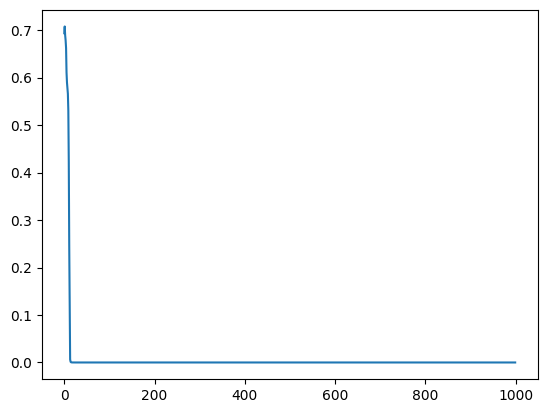

In [ ]:
plt.plot(losses);

In [ ]:
process_output_vector(model(x), all_categories)

[('1', 0),
 ('1', 0),
 ('1', 0),
 ('1', 0),
 ('2', 1),
 ('2', 1),
 ('2', 1),
 ('2', 1)]

In [ ]:
names

['aaa', 'acAa', 'aaaca', 'aaaac', 'bbb', 'bbdb', 'bbdbb', 'ddd']

In [ ]:
output = model(pad_sequence(['bbd', 'bbb', 'acAa', 'aaaca', 'bbb', 'bbb', 'bbdb']).unsqueeze(2))
print(torch.exp(output))
process_output_vector(output, all_categories)

tensor([[5.1292e-08, 1.0000e+00],
        [4.8806e-08, 1.0000e+00],
        [1.0000e+00, 2.5103e-09],
        [1.0000e+00, 3.5308e-09],
        [4.8806e-08, 1.0000e+00],
        [4.8806e-08, 1.0000e+00],
        [5.1788e-08, 1.0000e+00]], grad_fn=<ExpBackward0>)


[('2', 1), ('2', 1), ('1', 0), ('1', 0), ('2', 1), ('2', 1), ('2', 1)]

Класифікація імен за допомогою RNN на рівні символів
==============================================================


Ми будемо створювати та навчати базову рекурентну нейронну мережу (RNN) на рівні символів для класифікації слів.

Конкретно, ми будемо навчатися на кількох тисячах прізвищ з 18 мов походження та прогнозувати, з якої мови походить ім'я на основі його написання:

``` {.sourceCode .sh}
$ python predict.py Hinton
(-0.47) Шотландська
(-1.52) Англійська
(-3.57) Ірландська

$ python predict.py Schmidhuber
(-0.19) Німецька
(-2.48) Чеська
(-2.68) Голландська
```

Підготовка даних
------------------

Завантажимо дані names.zip та розпакуємо їх у поточний каталог.


In [ ]:
!unzip names.zip

Archive:  names.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [ ]:
!ls

data  names.zip  sample_data


У каталозі `data/names` містяться 18 текстових файлів, названих як `[Language].txt`. Кожен файл містить безліч імен, по одному імені на рядок, в основному романізованих (але нам все ще потрібно конвертувати імʼя з Unicode в ASCII).

Конвертація імен із Unicode в ASCII часто необхідна в задачах машинного навчання для стандартизації даних. Імена з різних мов можуть містити діакритичні знаки або символи, які відрізняються від стандартної латиниці. Це може ускладнити обробку текстових даних, особливо якщо ви використовуєте алгоритми, які менш стійкі до варіацій символів або якщо ваша модель потребує одноманітного набору символів.

Ми в результаті наступної попередньої обробки отримаємо словник списків імен за мовами, `{language: [names ...]}`. Загальні змінні "category" та "line" (для мови та імені в нашому випадку) використовуються для подальшої розширюваності.

In [ ]:
from io import open
import glob
import os

# Знаходить всі файли за вказаним шляхом
def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

['data/names/Irish.txt', 'data/names/Polish.txt', 'data/names/Italian.txt', 'data/names/Japanese.txt', 'data/names/Vietnamese.txt', 'data/names/Russian.txt', 'data/names/English.txt', 'data/names/Arabic.txt', 'data/names/Korean.txt', 'data/names/Chinese.txt', 'data/names/Greek.txt', 'data/names/Portuguese.txt', 'data/names/Spanish.txt', 'data/names/Dutch.txt', 'data/names/French.txt', 'data/names/Scottish.txt', 'data/names/Czech.txt', 'data/names/German.txt']


In [ ]:
# Перетворює рядок Unicode в простий ASCII, дякуємо https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Створюємо словник category_lines, список імен для кожної мови
category_lines = {}
all_categories = []

# Читає файл і розділяє на рядки
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

# Проходимо по кожному файлу у вказаній директорії
for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]  # Отримуємо назву категорії з імені файлу
    all_categories.append(category)  # Додаємо категорію до списку всіх категорій
    lines = readLines(filename)  # Читаємо всі рядки з файлу
    category_lines[category] = lines  # Додаємо список імен до словника за категоріями

n_categories = len(all_categories)  # Визначаємо кількість категорій

Slusarski


Тепер у нас є `category_lines`, словник, що відображає кожну категорію (мову) на список рядків (імен). Ми також створили `all_categories` (просто список мов) та `n_categories` для подальшого використання.

In [ ]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


Маємо 20 тис імен до слова:

In [ ]:
sum(len(v) for v in category_lines.values())

20074

Перетворення імен на тензори
==========================

Тепер, коли ми організували всі імена, нам потрібно перетворити їх на тензори, щоб мати можливість їх використовувати.

Щоб представити одну літеру, ми використовуємо "one-hot вектор" (one-hot vector) розміру `<1 x n_letters>`. One-hot вектор заповнений 0, за винятком 1 на індексі поточної літери, наприклад, `"b" = <0 1 0 0 0 ...>`.

Щоб створити слово, ми об'єднуємо кілька з цих векторів у 2D матрицю `<line_length x 1 x n_letters>`.

Цей додатковий 1 вимір потрібний, оскільки PyTorch вважає, що всі дані сформовані знаходиться в батчі - ми просто використовуємо розмір батча 1 тут. Насправді буває і unbayched input - але це рідкий кейс при тренуванні нейронних мереж.

In [ ]:
import torch

# Знаходимо індекс літери з all_letters, наприклад, "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Для демонстрації: перетворюємо літеру в тензор розміром <1 x n_letters>
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Перетворюємо рядок у тензор розміру <line_length x 1 x n_letters>,
# або масив векторів, що представляють літери у вигляді one-hot кодування
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


## Визначаємо мережу


In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN шар
        self.rnn = nn.LSTM(input_dim, hidden_dim, layer_dim)

        # Повнозвязний шар з лог софтмаксом
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out, _ = self.rnn(x)
        # Беремо лише значення на останньому time step для передбачення класу
        out = self.fc(out[-1, :, :])
        out = self.log_softmax(out)
        return out

In [ ]:
input_size = len(all_letters)
hidden_size = 128
n_categories = len(all_categories)

model = RNNModel(input_size, hidden_size, 1, n_categories)

In [ ]:
model

RNNModel(
  (rnn): LSTM(57, 128)
  (fc): Linear(in_features=128, out_features=18, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

Навчання
========

Підготовка до навчання
----------------------

Перед початком навчання ми повинні створити кілька допоміжних функцій. `categoryFromOutput` вже є. Ми також хочемо швидкий спосіб отримати приклад з навчального набору даних (ім'я та його мова):

In [ ]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Korean / line = Chung
category = Italian / line = Milano
category = Irish / line = Donnell
category = German / line = Zilberschlag
category = French / line = Brisbois
category = Japanese / line = Kozu
category = Italian / line = Pace
category = Polish / line = Mencher
category = Korean / line = Suk
category = Japanese / line = Inoue


Перевіряємо форму вхідних даних:

In [ ]:
randomTrainingExample()[3].shape

torch.Size([4, 1, 57])

Навчання мережі
====================

Тепер все, що потрібно для навчання цієї мережі, це показати їй кілька прикладів, дати їй можливість зробити припущення і сказати, якщо вона помиляється.

In [ ]:
criterion = nn.NLLLoss()

Кожен цикл навчання буде:

-   Обнуляти градієнти моделі
-   Проганяти дані через модель
-   Порівнювати передбачення моделі з ціллю
-   Виконувати зворотне поширення (back-propagate)
-   Повертати вихід та втрати (loss)

In [ ]:
def train(model, category_tensor, line_tensor, optimizer):
    "Опрацюванння одного екземпляра даних."

    model.zero_grad()

    output = model(line_tensor)

    # Порівнюємо пеердбачену категорію, отриману після опрацювання всієї послідовності
    # зі справжнім значенням
    loss = criterion(output, category_tensor)
    loss.backward()

    optimizer.step()

    return output, loss.item()

Тепер нам просто потрібно запустити це з великою кількістю прикладів. Оскільки функція `train` повертає як вихід, так і втрати, ми можемо вивести прогнози та також відстежувати втрати для побудови графіка. Оскільки у нас є тисячі прикладів, ми виводимо лише кожні `print_every` прикладів і беремо середнє значення втрат.

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Збираємо лоси для графіку
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(model, category_tensor, line_tensor, optimizer)
    current_loss += loss

    # Друкуємо номер ітерації ``iter``, loss, імʼя і передбачення мови
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output, all_categories)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Додаємо поточний середній лосс до списку відстеження лосів
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 17s) 4.0537 Duarte / French ✗ (Portuguese)
10000 10% (0m 34s) 1.1672 Kings / English ✓
15000 15% (0m 53s) 0.0607 Klerkx / Dutch ✓
20000 20% (1m 10s) 0.0029 Kefalas / Greek ✓
25000 25% (1m 28s) 0.5835 Rosario / Portuguese ✓
30000 30% (1m 47s) 0.2175 Doyle / Irish ✓
35000 35% (2m 4s) 0.4485 Pochtennyh / Russian ✓
40000 40% (2m 22s) 0.1888 Mishima / Japanese ✓
45000 45% (2m 41s) 1.8430 Elmer / German ✗ (English)
50000 50% (2m 58s) 0.0183 Fleming / Scottish ✓
55000 55% (3m 17s) 0.1776 Louverdis / Greek ✓
60000 60% (3m 36s) 0.4549 San nicolas / Spanish ✓
65000 65% (3m 54s) 0.7835 Maneates / Greek ✓
70000 70% (4m 14s) 0.0276 Africani / Italian ✓
75000 75% (4m 32s) 0.0144 Veronesi / Italian ✓
80000 80% (4m 52s) 0.8970 Kruse / English ✗ (German)
85000 85% (5m 10s) 0.0422 Muyskens / Dutch ✓
90000 90% (5m 29s) 0.0599 Boutros / Arabic ✓
95000 95% (5m 48s) 0.0885 Cavallo / Italian ✓
100000 100% (6m 6s) 2.2961 Robinson / Scottish ✗ (English)


In [ ]:
# Донавчимо нашу модель
n_iters = 10000

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(model, category_tensor, line_tensor, optimizer)
    current_loss += loss

    # Друкуємо номер ітерації ``iter``, loss, імʼя і передбачення мови
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output, all_categories)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Додаємо поточний середній лосс до списку відстеження лосів
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 50% (0m 19s) 0.4988 Suk / Korean ✓
10000 100% (0m 37s) 0.0013 Hsiao / Chinese ✓


Графік результатів
====================

Графік історичних втрат з `all_losses` показує, як мережа
навчається:

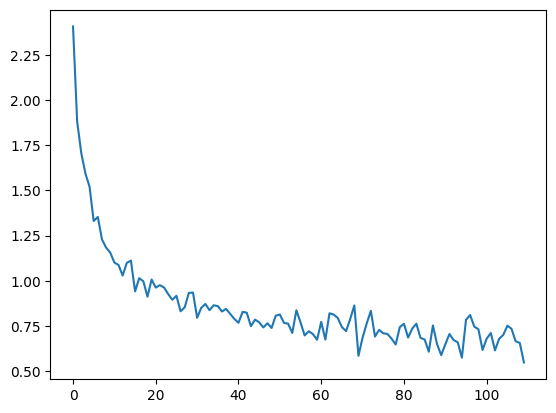

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.plot(all_losses);

Оцінка Результатів
======================

Щоб побачити, як добре мережа працює з різними категоріями, ми створимо матрицю плутанини (confusion matrix), яка вказує для кожної фактичної мови (рядки), яку мову мережа вгадує (стовпці). Для розрахунку матриці плутанини кілька зразків проходять через мережу з використанням `evaluate()`, що є тим самим, що й `train()`, за винятком зворотного поширення (backprop).

<ipython-input-93-0ffae473ab2b>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-93-0ffae473ab2b>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


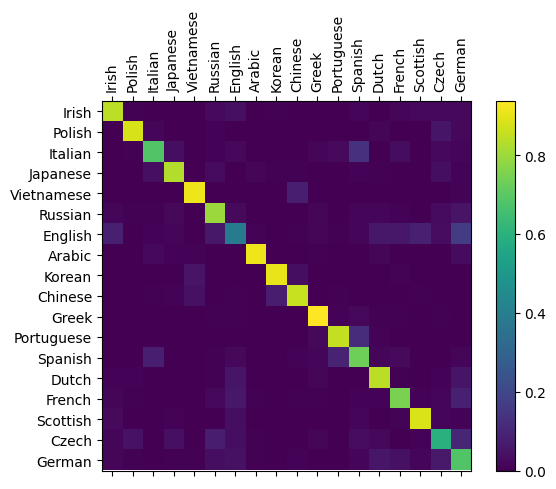

In [ ]:
def plot_confusion(model):
  # Відстеження правильних здогадок у матриці плутанини
  confusion = torch.zeros(n_categories, n_categories)
  n_confusion = 10000

  # Проходження через безліч прикладів і запис правильних здогадок
  for i in range(n_confusion):
      category, line, category_tensor, line_tensor = randomTrainingExample()
      output = model(line_tensor)
      guess, guess_i = categoryFromOutput(output, all_categories)
      category_i = all_categories.index(category)
      confusion[category_i][guess_i] += 1

  # Нормалізація шляхом ділення кожного рядка на його суму
  for i in range(n_categories):
      confusion[i] = confusion[i] / confusion[i].sum()

  # Налаштування графіка
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(confusion.numpy())
  fig.colorbar(cax)

  # Налаштування осей
  ax.set_xticklabels([''] + all_categories, rotation=90)
  ax.set_yticklabels([''] + all_categories)

  # Встановлення підпису на кожній мітці
  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  # sphinx_gallery_thumbnail_number = 2
  plt.show();

plot_confusion(model)

Було до цього:

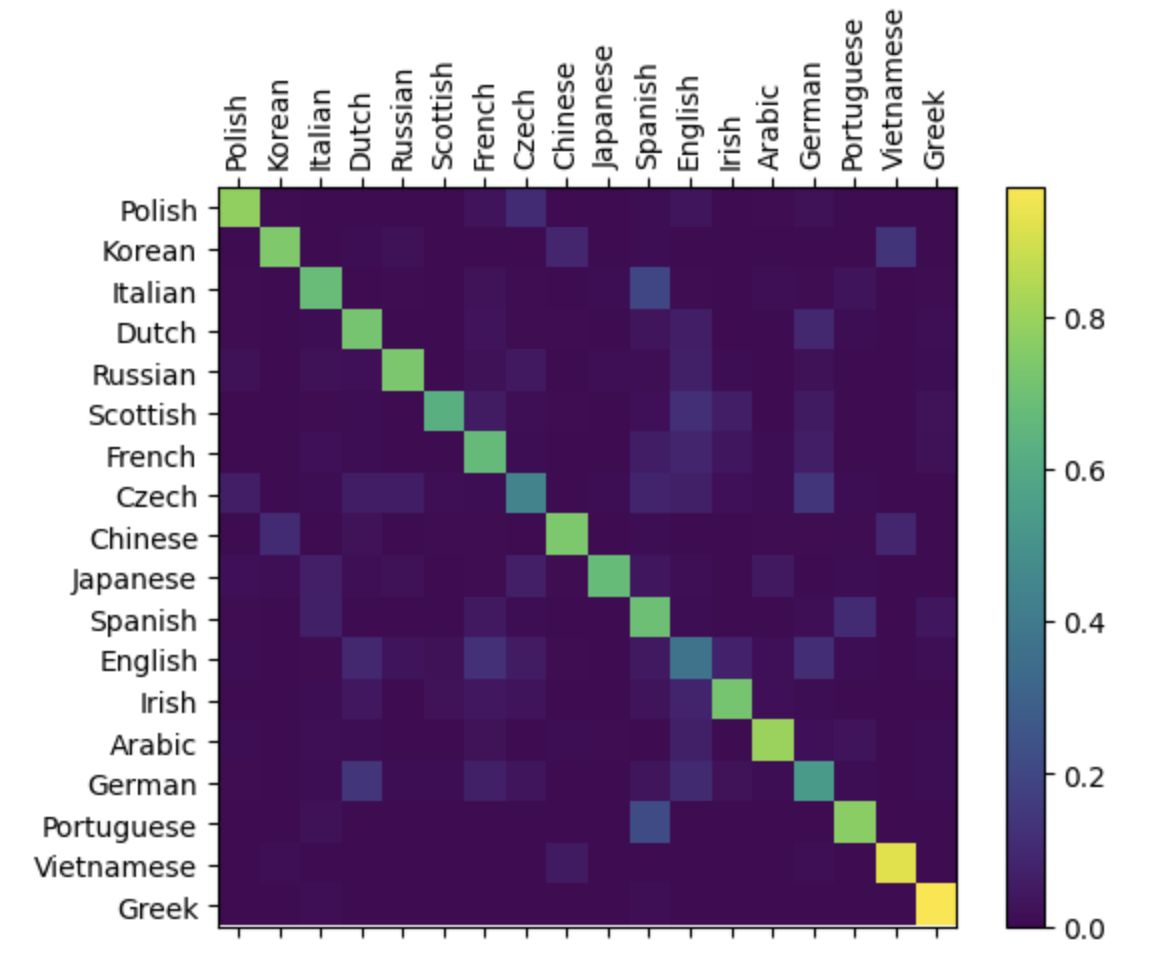

Можемо бачити, що нова модель спрацювала краще. Ви можете перевірити, як працювала б RNN.

Запуск на основі введення користувача
=====================

In [ ]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = model(lineToTensor(input_line))

        # Отрмуємо топ N категорій
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Pylieva')
predict('Jackson')
predict('Satoshi')
predict('Trump')


> Pylieva
(-0.31) Czech
(-1.36) Spanish
(-4.79) Italian

> Jackson
(-0.00) Scottish
(-5.74) English
(-9.32) French

> Satoshi
(-0.03) Japanese
(-3.89) Russian
(-5.79) Chinese

> Trump
(-0.82) English
(-1.40) Russian
(-1.99) Dutch
